## Lab 1 - Python fundamentals

Sources used:

https://www.youtube.com/watch?v=KuJso02epfM<br>
https://www.youtube.com/watch?v=39zXa7lVXK8<br>
https://www.youtube.com/watch?v=NY6C8_xCi1w<br>
https://www.youtube.com/watch?v=W_kr4kHJ-MI<br>
https://www.youtube.com/watch?v=9Ez_sb4wyxc&list=PLpHkXU1Ab_H9zqVwsPYQuKX8ae3WEj8FU<br>
https://www.youtube.com/watch?v=7uVVS5WbD4E<br>
https://www.w3schools.com/python/matplotlib_bars.asp<br>
https://stackoverflow.com/questions/16010869/plot-a-bar-using-matplotlib-using-a-dictionary<br>
https://www.w3schools.com/python/matplotlib_labels.asp<br>
https://www.datacamp.com/tutorial/python-bar-plot<br>
https://stackoverflow.com/questions/16010869/plot-a-bar-using-matplotlib-using-a-dictionary?<br>
https://www.digitalocean.com/community/tutorials/python-add-to-dictionary#adding-to-a-dictionary-using-the-update-operator<br>
https://realpython.com/sort-python-dictionary/<br>
https://stackoverflow.com/questions/64503641/how-to-check-if-a-subplot-is-empty-in-matplotlib<br>
https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.MaxNLocator<br>
https://www.geeksforgeeks.org/python/counters-in-python-set-1/<br>
https://www.geeksforgeeks.org/python/iterate-over-a-dictionary-in-python/<br>
https://www.geeksforgeeks.org/python/python-dictionary-comprehension/

Import needed packages/modules

In [8]:
# Import pyplot module from the matplotlib package for data visualization
import matplotlib.pyplot as plt

# Import the math module for mathematical functions and constants
import math 

# Import the ticker module to customize tick marks and labels on axes
import matplotlib.ticker as ticker

Define function for reading and counting DNA sequences

In [10]:
# this will be the main container, there counted dna sequences will be stored
dna_data = {} 

def return_dictionary(inputfile):
      
    """Read a DNA file and returns a dictionary containing the frequency of each DNA letter per sequence.
    You can use this function with any DNA file. 
    If no full path is provided, the file must be located in the same directory as the notebook."""

    # this will be a placeholder and store seqeunce header, ex; ">seq1"
    sequence_id = "" 
    
    # temporary dictionary for storing and calculating each dna letter for each sequence
    sequence_data = {} 

    # open file as dna_file
    with open(inputfile, "r") as dna_file: 

        # loop trough the file line by line. 
        for line in dna_file: 
            
            # remove newline "\n"
            line = line.strip() 

            # here we check if its a seqeunce id. 
            if line[0] == ">": 
                    
                    # to avoid losing data, we need store current data before we start a new seqeunce.                    
                    if sequence_id and sequence_data: 
                        dna_data[sequence_id] = sequence_data

                    # sequence_id will be given a name like ">seq1"
                    sequence_id = line 

                    # restore this parameter before starting a new sequence
                    sequence_data = {} 
                
            # if line is not a seqeunce_id we calculate each dna letter
            else:
                for letter in line.lower():
                    if letter in sequence_data:
                             sequence_data[letter] += 1
                    else:
                        sequence_data[letter] = 1
        
        # we need to store the last sequence otherwise we will lose data.
        if sequence_id and sequence_data:
             dna_data[sequence_id] = sequence_data

    return dna_data

In [12]:
return_dictionary("dna_raw_complicated.txt")

{'>seq1': {'c': 8, 'g': 2, 't': 7, 'a': 17},
 '>seq2': {'a': 3, 'g': 10, 'c': 4, 't': 7},
 '>seq3': {'g': 21, 'c': 34, 'a': 36, 't': 19, 'n': 2},
 '>seq4': {'g': 20, 'c': 15, 'a': 17, 't': 12}}

### Visualization of DNA Sequences

The purpose of bellow code block is to visualize the frequency of DNA bases for each sequence in the dataset.<br>
Each sequence is displayed as an individual bar chart, arranged in a dynamically generated grid layout.<br>

By showing all sequences side by side, it becomes easier to compare base composition patterns and variations between them.<br>
The base order (A, C, G, T, N) is kept consistent across all plots for clarity, <br> and the layout is adjusted to prevent overlapping titles and labels.<br>
This approach provides a clear overview of how different DNA sequences differ in their nucleotide composition.

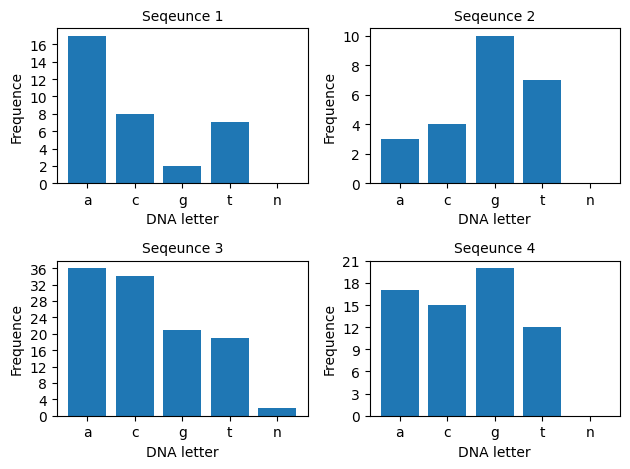

In [ ]:
# Calculate how many seqeunces there are in the dictionary. 
num_seq = len(dna_data) 

# Dynamically calculate how many rows and columns are needed for the subplot grid
rows = math.ceil(num_seq / 3) # Number of rows runded up 
cols = math.ceil(num_seq / rows)     # Number of columns rounded up

# Create the figure and a grid of subplots 
dna_figure, subplot_axes = plt.subplots(rows, cols) # "dna_fig" is the draw area 

# Flatten the 2D array of axes objects into a 1D list
# This makes it easier to loop through and access each subplot
subplot_area = subplot_axes.flatten() 

# define a fixed bilogical order for the DNA bases (x-axis) 
# Using A,C,G,T as standard order, 'N' added last for unknown bases.
base_order = ["a","c","g","t","n"]

# Loop through each DNA sequence and plot each subplot
for i, (seq_name, freq_dict) in enumerate(dna_data.items()):
    
    # Select the subplot (axis) that corresponds to the current sequence
    seq_plot = subplot_area[i]
   
    # Create a list for frequences in the same order as "base_order".
    # if base not exist in the sequence, return 0 for avoid KeyError.
    Values = [freq_dict.get(base, 0) for base in base_order]

    # Set the title of each seqeunce dynamically
    # seq_name[4:0] extracts only the sequence number from the strings like ">seq1"
    seq_plot.set_title(f"Seqeunce {seq_name[4:]}", fontsize = 10)
    
    # Draw a bar chart for the current sequence
    seq_plot.bar(base_order, Values)

    # Label the x- and y-axes
    seq_plot.set_xlabel("DNA letter")
    seq_plot.set_ylabel("Frequence")

# loop through each subplot and hide if there are any with no data. 
for sub_p in subplot_area: 
     if not sub_p.lines and not sub_p.patches: 
            sub_p.set_visible(False)

# this forces matplotlib use integer on y-axis
for sub_p in subplot_area:
     sub_p.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))   

# Adjust spacing between subplots so titles and labels do not ovelap
plt.tight_layout()